***CUSTOMER RELATIONSHIP PREDICTION***



***Team members:***<br>


*   Aparna Wani
*   Divyanshu Torlikonda
*   Ravindra Manne
*   Vaishnavi M R







#**Introduction**<br>
   The KDD Cup 2009 dataset has three variables, namely, **Churn**, **Appetency** and **Upselling**, upon which the predictions and inferences can be made. <br>
   Among these response variables, our team intends to predict the class of Churn data. Here, we build models to predict if an individual becomes a part of the business or not when given certain features about the business or(and) about the individual. Further, we analyze how well our models perform based on known metrics.

# Importing the necessary files and reading the data

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score, f1_score, roc_curve,roc_auc_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from prettytable import PrettyTable

from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
os.chdir("/content/drive/MyDrive/CRM_project/AI1Project/rawdata/")

!ls

orange_small_test.data		     orange_small_train.data
orange_small_test.data.cksum	     orange_small_train.data.cksum
orange_small_train_appetency.labels  orange_small_train_upselling.labels
orange_small_train_churn.labels


**Load the data**

In [4]:
train_data = pd.read_csv('orange_small_train.data',sep='\t')
train_data.head(2)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN


In [5]:
test_data = pd.read_csv('orange_small_test.data',sep='\t')
test_data.head(2)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1225.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259.0,0.0,NaN,NaN,NaN,...,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN


In [6]:
churn_data = pd.read_csv('orange_small_train_churn.labels',names=['churn'])
churn_data.head(2)

,churn
0,-1
1,1


In [7]:
appetency_data = pd.read_csv('orange_small_train_appetency.labels',names=['appetency'])
appetency_data.head(2)

,appetency
0,-1
1,-1


In [8]:
upselling_data = pd.read_csv('orange_small_train_upselling.labels',names=['upselling'])
upselling_data.head(2)

,upselling
0,-1
1,-1


In [9]:
print(train_data.shape); print(test_data.shape); print(appetency_data.shape); print(upselling_data.shape);print(churn_data.shape)

(50000, 230)
(50000, 230)
(50000, 1)
(50000, 1)
(50000, 1)


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


# Preprocessing and Cleaning the data


**Get the no of columns with numerical and categorical values**

In [11]:
train_data.dtypes.value_counts()

float64    191
object      38
int64        1
dtype: int64

**Get the % of missing values per column**

In [12]:
miss_val_perc = pd.Series(train_data.isnull().sum()/train_data.shape[0])
miss_val_perc.name = "miss_perc"
miss_val_perc.index.name = "varname"

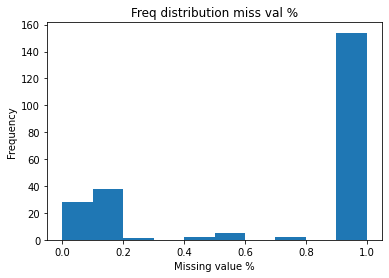

In [13]:
plt.hist(miss_val_perc, bins=10)
plt.xlabel("Missing value %")
plt.ylabel("Frequency")
plt.title("Freq distribution miss val %")
plt.show()

In [14]:
print(f" No of columns with more than 70% missing values: {len(miss_val_perc[miss_val_perc>=0.7])}")

 No of columns with more than 70% missing values: 156


In [15]:
print(f" No of columns with 100% missing values: {len(miss_val_perc[miss_val_perc==1.0])}")

 No of columns with 100% missing values: 18


In [16]:
len(miss_val_perc) - len(miss_val_perc[miss_val_perc>=0.7])

74

In [17]:
drop_col_list = miss_val_perc[miss_val_perc>=0.7].index

In [18]:
len(drop_col_list)

156

In [19]:
train_data_updated = train_data.drop(drop_col_list, axis=1)

In [20]:
train_data_updated.dtypes.value_counts()

float64    41
object     32
int64       1
dtype: int64

In [21]:
## Get the list of numerical variables in the data
numeric_col_list = train_data_updated._get_numeric_data().columns
len(numeric_col_list)

42

In [22]:
categorical_col_list = set(train_data_updated.columns) - set(numeric_col_list)
len(categorical_col_list)

32

**Get the categorical variables with missing values and unique values > 10**

In [29]:
desc_stat_cate = train_data_updated[categorical_col_list].describe().T

desc_stat_cate

,count,unique,top,freq
Var221,50000,7,oslk,37009
Var223,44789,4,LM8l689qOp,36608
Var203,49857,5,9_Y1,45233
Var192,49631,361,qFpmfo8zhV,385
Var210,50000,6,uKAI,47570
Var206,44471,21,IYzP,17274
Var197,49857,225,0Xwj,4629
Var218,49297,2,cJvF,25319
Var204,50000,100,RVjC,1819
Var196,50000,4,1K8T,49550


In [ ]:
desc_stat_cate = pd.concat([desc_stat_cate, miss_val_perc], axis=1, join='inner')
desc_stat_cate = desc_stat_cate.sort_values(by= ['miss_perc','unique'], ascending = False)

In [ ]:
drop_vars_cate = desc_stat_cate[(desc_stat_cate['unique']>10)].index

len(drop_vars_cate)

20

In [ ]:
train_data_updated = train_data_updated.drop(drop_vars_cate, axis=1)


In [ ]:
#update the list of categorical variables
categorical_col_list = list(set(categorical_col_list) - set(drop_vars_cate))

# Replace the nas with mode
train_data_updated[categorical_col_list] = train_data_updated[categorical_col_list].fillna(train_data_updated[categorical_col_list].mode().iloc[0])

In [ ]:
train_data_updated[numeric_col_list] = train_data_updated[numeric_col_list].fillna(train_data_updated[numeric_col_list].median())

In [ ]:
train_data_updated.loc[(train_data_updated["Var203"] == 'dgxZ') | (train_data_updated["Var203"] == 'pybr'), 'Var203'] = '9_Y1' 
train_data_updated.loc[(train_data_updated["Var229"] == 'sk2h') | (train_data_updated["Var229"] == 'oJmt'), 'Var229'] = 'am7c' 

In [ ]:
# From the categorical variables keep the following variables only 
keep_var_categorical = ['Var218', 'Var208', 'Var211', 'Var221', 'Var223', 'Var205', 'Var227', 'Var225', 'Var229', 'Var203']

In [ ]:
train_data_updated = train_data_updated[list(numeric_col_list) + keep_var_categorical ]

In [ ]:
train_data_updated.shape

(50000, 52)

In [ ]:
#scaler = StandardScaler()
scaler = Normalizer()
train_data_scale = train_data_updated.copy()
train_data_scale[numeric_col_list] = scaler.fit_transform(train_data_scale[numeric_col_list])

In [ ]:
# Keep the columns from train data in test data
keep_cols = train_data_updated.columns
test_data = test_data[keep_cols]

In [ ]:
test_data.shape == train_data_updated.shape

True

In [ ]:
train_data_updated.columns == test_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
test_data.loc[(test_data["Var203"] == 'dgxZ') | (test_data["Var203"] == 'pybr'), 'Var203'] = '9_Y1' 
test_data.loc[(test_data["Var229"] == 'sk2h') | (test_data["Var229"] == 'oJmt'), 'Var229'] = 'am7c' 

In [ ]:
# Replace the NAs for the categorical variables with mode 
test_data[keep_var_categorical] = test_data[keep_var_categorical].fillna(train_data_updated[keep_var_categorical].mode().iloc[0])

In [ ]:
# Replace the NAs for the numeric variables with median
test_data[numeric_col_list] = test_data[numeric_col_list].fillna(train_data_updated[numeric_col_list].median())

In [ ]:
# Apply the scaling on the numeric variables
test_data_scale = test_data.copy()
test_data_scale[numeric_col_list] = scaler.fit_transform(test_data_scale[numeric_col_list])

In [ ]:
test_data_scale.shape

(50000, 52)

In [ ]:
test_data.shape

(50000, 52)

In [ ]:
test_data.head(2)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var218,Var208,Var211,Var221,Var223,Var205,Var227,Var225,Var229,Var203
0,1225.0,7.0,100.0,156.0,195.0,0.0,72.0,166.56,0.0,4259232.0,...,cJvF,kIsH,L84s,Al6ZaUT,LM8l689qOp,VpdQ,ZI9m,ELof,am7c,9_Y1
1,259.0,0.0,0.0,192.0,240.0,0.0,40.0,300.32,5.0,4859550.0,...,cJvF,kIsH,L84s,oslk,LM8l689qOp,VpdQ,RAYp,ELof,am7c,9_Y1


In [ ]:
test_data_scale.head(2)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var218,Var208,Var211,Var221,Var223,Var205,Var227,Var225,Var229,Var203
0,0.000127,7.243477e-07,0.00001,0.000016,0.000020,0.0,0.000007,0.000017,0.000000e+00,0.440738,...,cJvF,kIsH,L84s,Al6ZaUT,LM8l689qOp,VpdQ,ZI9m,ELof,am7c,9_Y1
1,0.000020,0.000000e+00,0.00000,0.000015,0.000019,0.0,0.000003,0.000024,3.916097e-07,0.380609,...,cJvF,kIsH,L84s,oslk,LM8l689qOp,VpdQ,RAYp,ELof,am7c,9_Y1


In [ ]:
train_data_updated.shape

(50000, 52)

In [ ]:
train_data_updated.head(2)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var218,Var208,Var211,Var221,Var223,Var205,Var227,Var225,Var229,Var203
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,cJvF,kIsH,L84s,oslk,jySVZNlOJy,VpdQ,RAYp,ELof,am7c,9_Y1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,cJvF,kIsH,L84s,oslk,LM8l689qOp,sJzTlal,RAYp,ELof,am7c,9_Y1


In [ ]:
train_data_scale.head(2)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var218,Var208,Var211,Var221,Var223,Var205,Var227,Var225,Var229,Var203
0,0.000587,0.000003,0.000071,0.000178,0.000223,5.385058e-06,0.000049,0.000064,0.0,0.001373,...,cJvF,kIsH,L84s,oslk,jySVZNlOJy,VpdQ,RAYp,ELof,am7c,9_Y1
1,0.000042,0.000000,0.000000,0.000013,0.000017,1.593841e-07,0.000002,0.000028,0.0,0.379730,...,cJvF,kIsH,L84s,oslk,LM8l689qOp,sJzTlal,RAYp,ELof,am7c,9_Y1


In [ ]:
train_data_scale[keep_var_categorical] = train_data_scale[keep_var_categorical].astype('category')
test_data_scale[keep_var_categorical] = test_data_scale[keep_var_categorical].astype('category')

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_data_scale[keep_var_categorical])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
train_data_scale_enc = pd.DataFrame(enc.transform(train_data_scale[keep_var_categorical]).toarray(), columns = enc.get_feature_names_out())
test_data_scale_enc = pd.DataFrame(enc.transform(test_data_scale[keep_var_categorical]).toarray(), columns = enc.get_feature_names_out())

In [ ]:
train_data_scale_enc.shape

(50000, 35)

In [ ]:
test_data_scale_enc.shape

(50000, 35)

In [ ]:
train_data_scale_enc = pd.concat([train_data_scale_enc, train_data_scale[numeric_col_list]], axis=1, join='inner')

In [ ]:
train_data_scale_enc.shape

(50000, 77)

In [ ]:
test_data_scale_enc = pd.concat([test_data_scale_enc, train_data_scale[numeric_col_list]], axis=1, join='inner')

In [ ]:
test_data_scale_enc.shape

(50000, 77)

In [ ]:
test_data_scale_enc.head(2)

,Var218_UYBR,Var218_cJvF,Var208_kIsH,Var208_sBgB,Var211_L84s,Var211_Mtgm,Var221_Al6ZaUT,Var221_JIiEFBU,Var221_QKW8DRm,Var221_d0EEeJi,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.026592,0.000071,0.0,3.461823e-06,0.152928,0.697077,0.000055,0.014777,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.028453,0.000000,0.0,7.172286e-07,0.022181,0.831918,0.000003,0.019012,0.0,0.0


In [ ]:
train_data_scale_enc.head(2)

,Var218_UYBR,Var218_cJvF,Var208_kIsH,Var208_sBgB,Var211_L84s,Var211_Mtgm,Var221_Al6ZaUT,Var221_JIiEFBU,Var221_QKW8DRm,Var221_d0EEeJi,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.026592,0.000071,0.0,3.461823e-06,0.152928,0.697077,0.000055,0.014777,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.028453,0.000000,0.0,7.172286e-07,0.022181,0.831918,0.000003,0.019012,0.0,0.0


# Exploratory data analysis

##***Response variables***

In [ ]:
churn_data.value_counts()

churn
-1       46328
 1        3672
dtype: int64

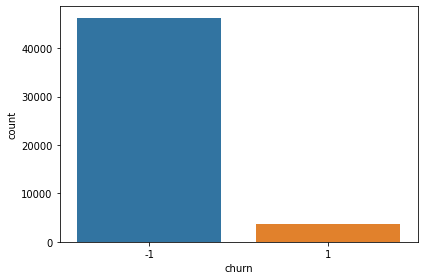

In [ ]:
sns.countplot(x=churn_data['churn'])
plt.tight_layout()
plt.show()

In [ ]:
appetency_data.value_counts()

appetency
-1           49110
 1             890
dtype: int64

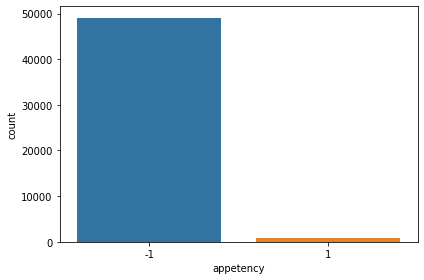

In [ ]:
sns.countplot(x=appetency_data['appetency'])
plt.tight_layout()
plt.show()

In [ ]:
upselling_data.value_counts()

upselling
-1           46318
 1            3682
dtype: int64

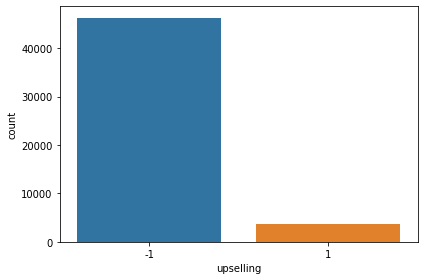

In [ ]:
sns.countplot(x=upselling_data['upselling'])
plt.tight_layout()
plt.show()

Here, we can see that all the 3 response variables given in the training set are categorical variables and are highly imbalanced. So, we can say that this imbalance is going to affect our results negatively unless we fix it using known statistical methods.

##***Univariate data analysis***

In this section, we have presented the distributions of each of the numerical datasets to analyse better what kind of scaling we need to use. Intitially, we used the standardscaler() function of sklearn. That didn't help us to eliminate the skewness or variance of the datasets. So, we are working with the other kind of scaling that is familiar to us,i.e., Normalization.<br>
We also tried to use Power Transformer and RobustScaling methods. Though these removed the skewness and variance upto a certain extent and performed better than the previous scaling measures, as the implementation part of it is not known to us completely, we did not use it.

In [ ]:
numeric_col_list = train_data_scale._get_numeric_data().columns
print(np.shape(train_data_scale[numeric_col_list]))

(50000, 42)


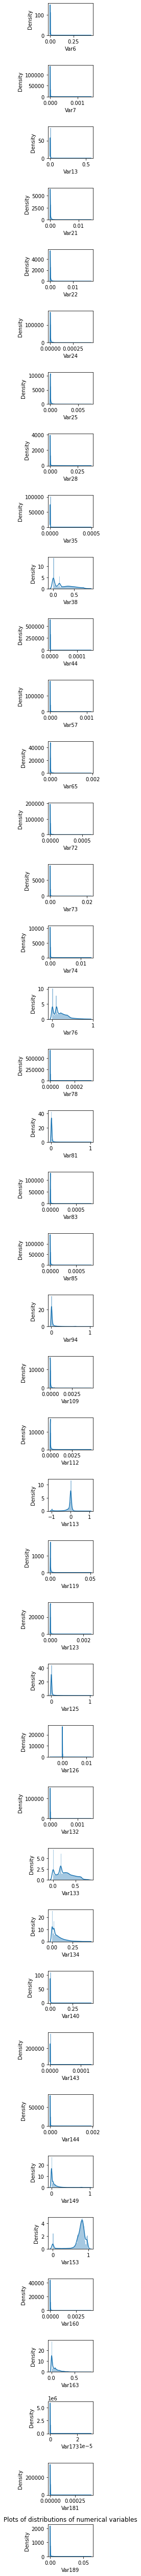

In [ ]:
#Distributions of each numerical variable
fig,ax = plt.subplots(42,1,figsize=(3,70))
plt.title('Plots of distributions of numerical variables')
for i in range(len((train_data_scale[numeric_col_list]).T)):
  sns.distplot(x=train_data_scale[numeric_col_list[i]],ax=ax[i])
  ax[i].set_xlabel(f'{numeric_col_list[i]}')
plt.tight_layout()
plt.show()

In the above plots, we can see that many of the plots are highly skewed. This shows that there is a lot of imbalance in the numerical datasets. Further, the plots indicate that there are outliers. So, we need to detect and handle those outliers. For that purpose, we make use of the box plots shown below.

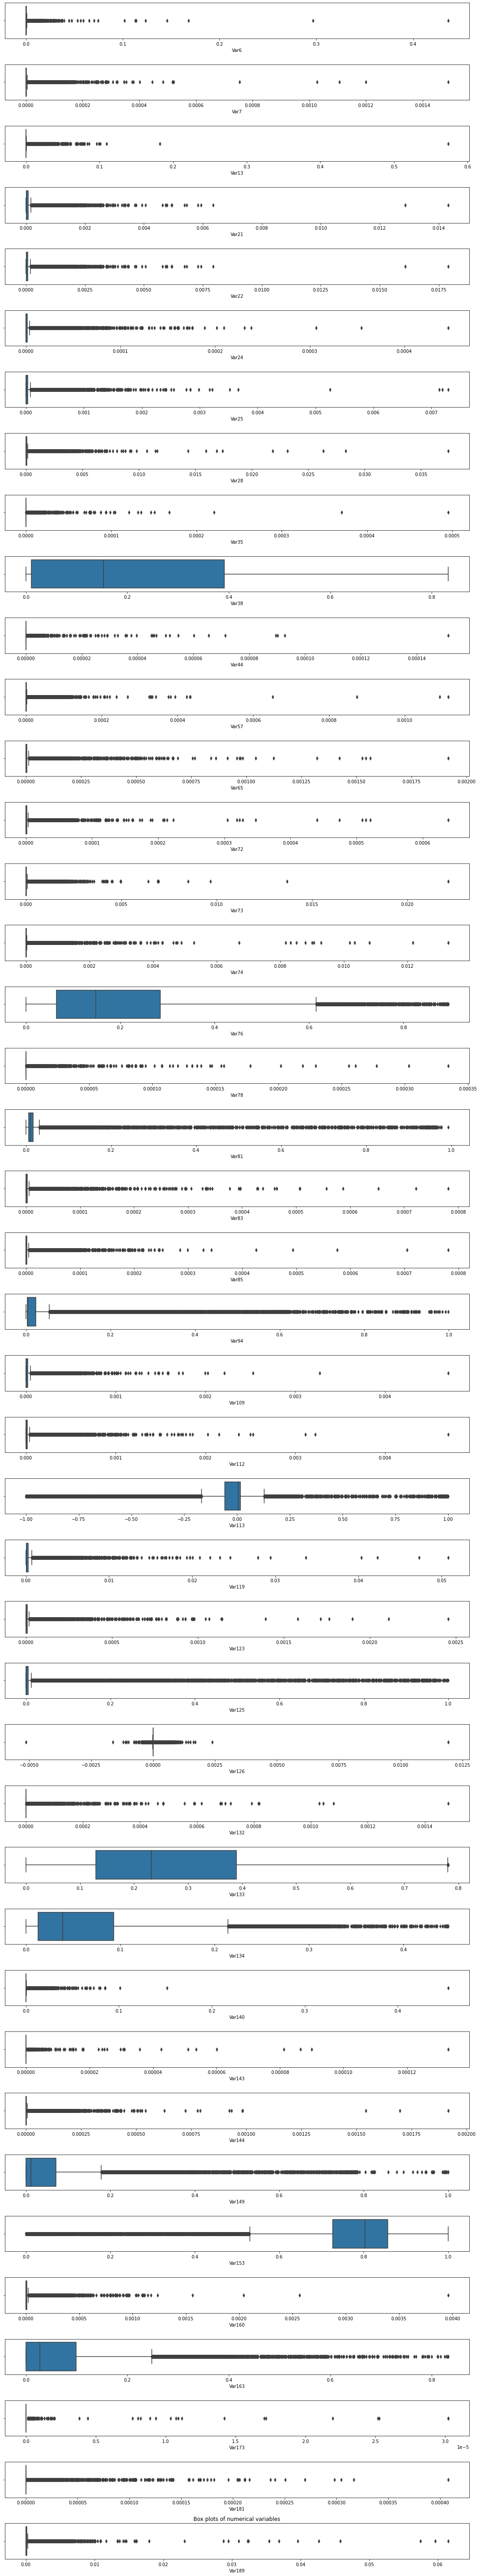

In [ ]:
#Box-plot to detect the outliers
fig,ax = plt.subplots(42,1,figsize=(15,80))
plt.title('Box plots of numerical variables')
for i in range(len((train_data_scale[numeric_col_list]).T)):
  sns.boxplot(x=train_data_scale[numeric_col_list[i]],ax=ax[i])
plt.tight_layout()
plt.show()

The box plots above give a better picture of the outliers. However, we do not know what are the different kind of outliers that are present in this dataset as we do not have enough information about the variables of the dataset. So, at this level we are unsure if we should drop or replace the outliers. Also, we do not know how badly they will affect our model performance at this stage.

##***Multivariate analysis***

Here, we verify if there is any correlation between one or more continuous variables. This is because multicollinearity can highly skew our results and add bias to them. So, we need to check for this factor.

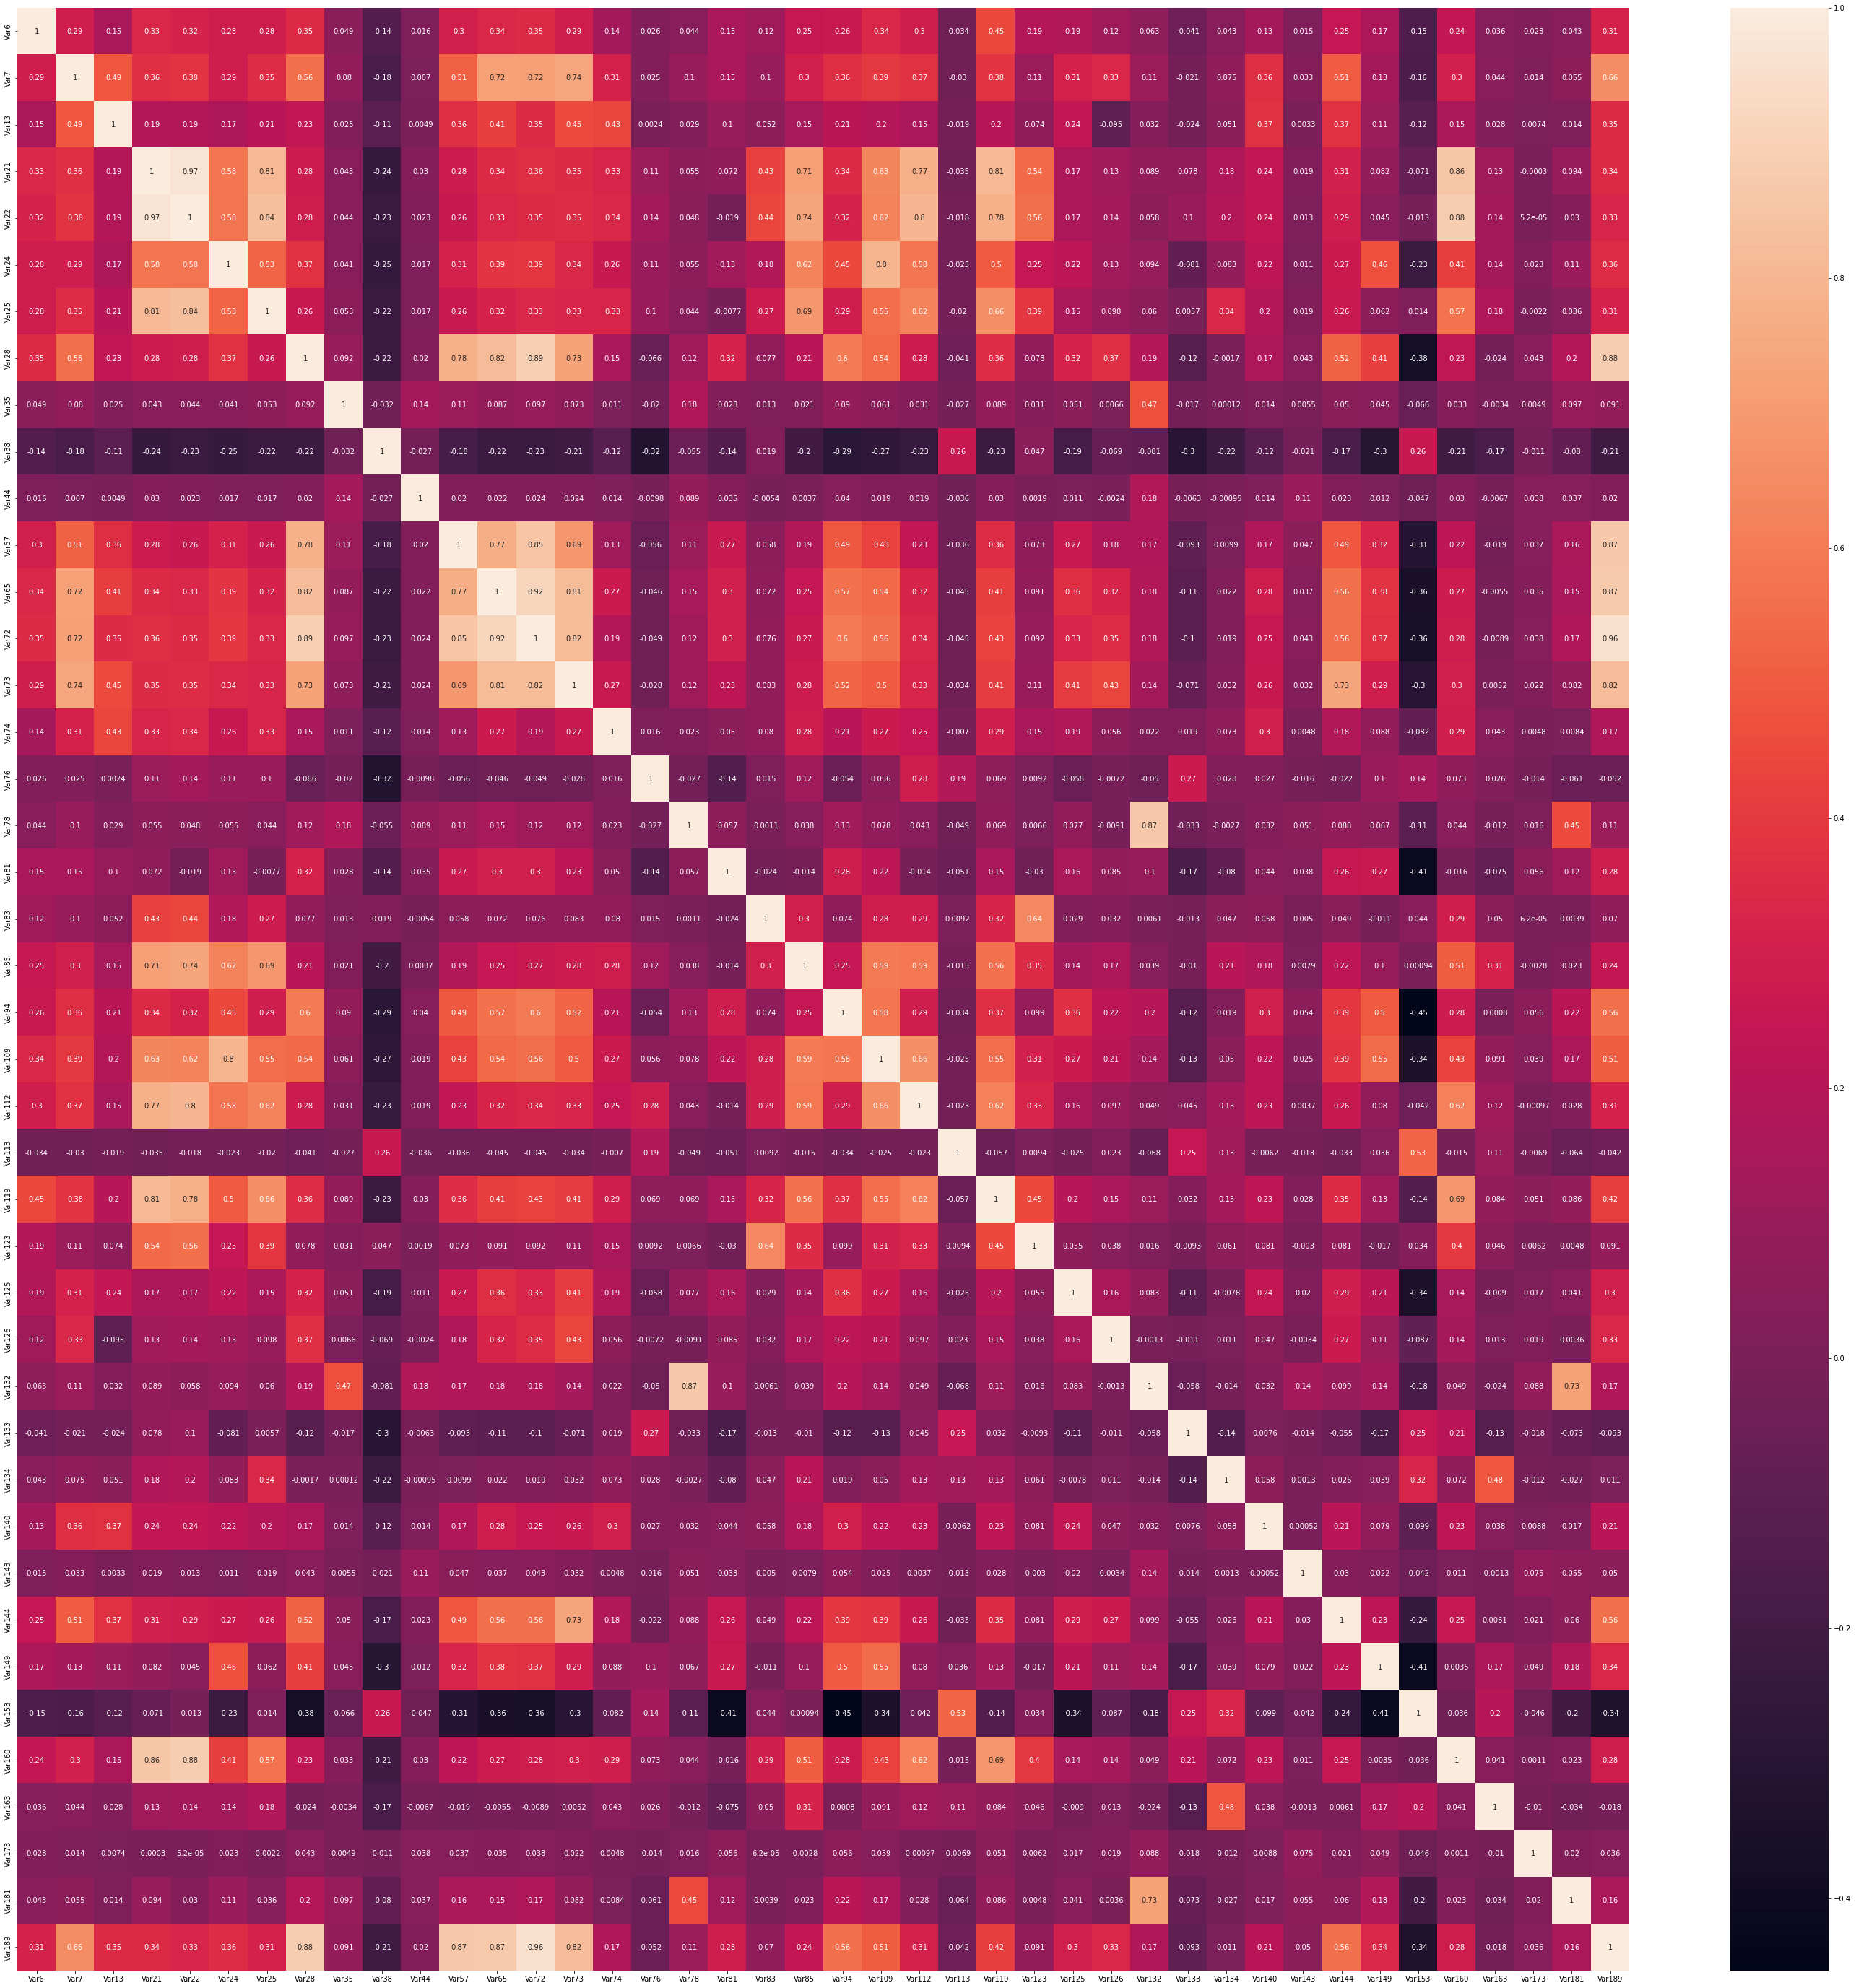

In [ ]:
#Heatmap for correlation between the datasets
correlated_data = train_data_scale[numeric_col_list].corr()
fig=plt.figure(figsize=(50,50))
sns.heatmap(correlated_data,annot=True)
plt.show()

In [ ]:
np.shape(correlated_data)

(42, 42)

In [ ]:
#Dropping the highly correlated datasets
for i in range(len(correlated_data)):
  for j in range(len(correlated_data)):
    if ((j>i)&(correlated_data.iat[i,j]>=0.95)):
        train_data_scale_enc.drop(numeric_col_list[j],axis=1,inplace=True)
        test_data_scale_enc.drop(numeric_col_list[j],axis=1,inplace=True)

Since there are some datasets with very high correlation(greater than 0.95), we drop a few columns from the train and test datasets to decrease the multi-collinearity.

##***Categorical variables***

In this part, we check for frequencies of the unique values occur in each of categorical variables chosen from the original dataset and account for the imbalances.

In [ ]:
train_data_scale[keep_var_categorical]

,Var218,Var208,Var211,Var221,Var223,Var205,Var227,Var225,Var229,Var203
0,cJvF,kIsH,L84s,oslk,jySVZNlOJy,VpdQ,RAYp,ELof,am7c,9_Y1
1,cJvF,kIsH,L84s,oslk,LM8l689qOp,sJzTlal,RAYp,ELof,am7c,9_Y1
2,UYBR,kIsH,L84s,Al6ZaUT,jySVZNlOJy,VpdQ,02N6s8f,kG3k,am7c,9_Y1
3,UYBR,kIsH,Mtgm,oslk,LM8l689qOp,VpdQ,RAYp,ELof,am7c,9_Y1
4,UYBR,kIsH,L84s,oslk,LM8l689qOp,sJzTlal,RAYp,kG3k,mj86,9_Y1
...,...,...,...,...,...,...,...,...,...,...
49995,cJvF,kIsH,L84s,oslk,LM8l689qOp,VpdQ,RAYp,ELof,am7c,9_Y1
49996,UYBR,kIsH,Mtgm,oslk,LM8l689qOp,09_Q,RAYp,kG3k,am7c,9_Y1
49997,UYBR,kIsH,L84s,oslk,LM8l689qOp,VpdQ,RAYp,ELof,am7c,F3hy
49998,UYBR,kIsH,Mtgm,oslk,LM8l689qOp,09_Q,RAYp,ELof,am7c,9_Y1


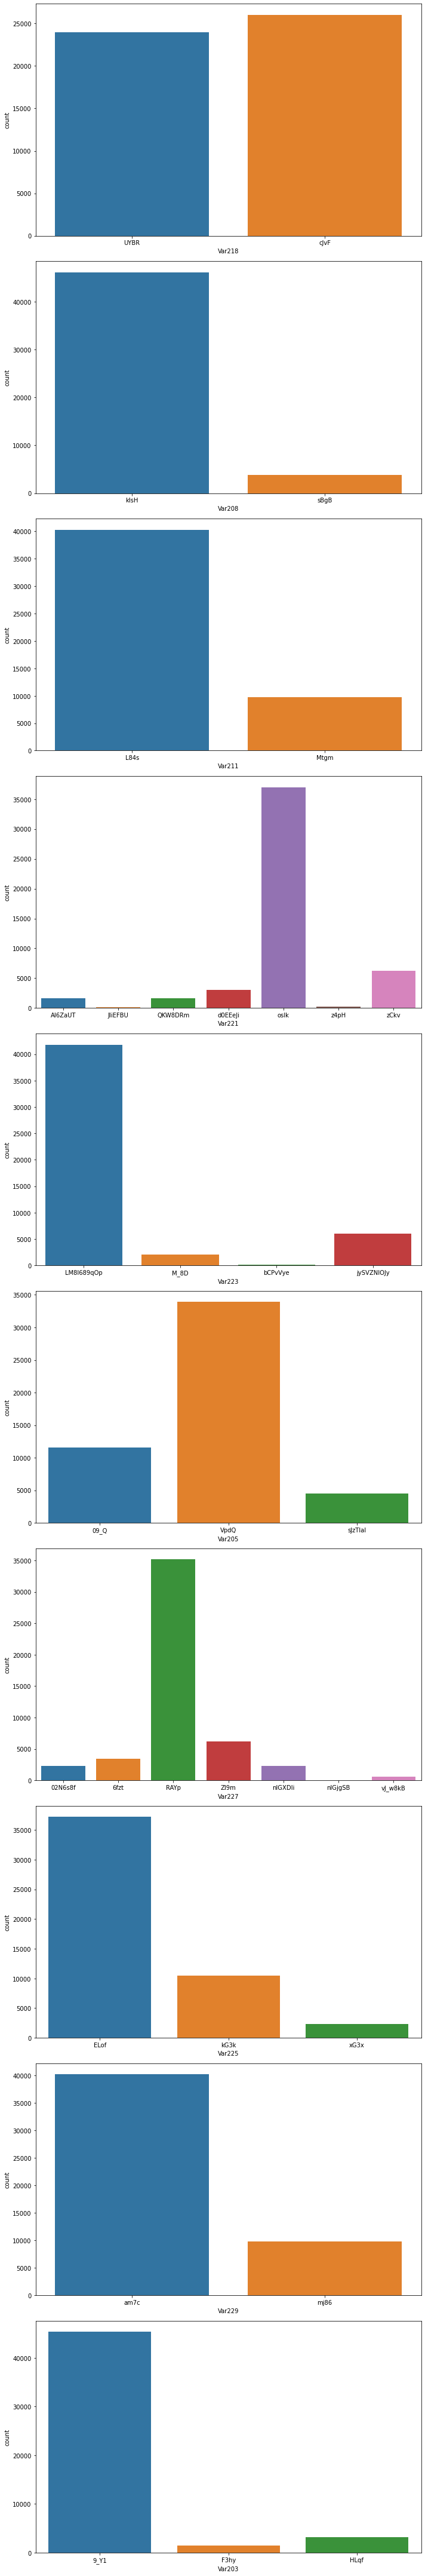

In [ ]:
#Graphical representation of distinct unique values and their counts
fig,ax = plt.subplots(10,1,figsize=(8,60))
plt.title('Countplots of categorical variables')
for i in range(len(keep_var_categorical)):
  sns.countplot(x=train_data_scale[keep_var_categorical[i]],ax=ax[i])
plt.tight_layout()
plt.show()

As it can be seen in the plots, the categorical datasets account for a lot of imbalances.
<br>
We also have to check for correlation between the categorical variables. There are some statistical tools like Chi-square test that help us analyze this, but we are unsure about how it should be implemented. So, we are continuing without checking for correlation between the categorical datasets.



#Initializing the base model - **Logistic Regression**

**CHURN LABEL**

In [ ]:
#Predictor & Response variables
X = train_data_scale_enc
y = (churn_data['churn'].values+1)/2

In [ ]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37500, 75)
(12500, 75)
(37500,)
(12500,)


In [ ]:
#Upsampling using RandomOverSampler() method
ros = RandomOverSampler()
X_train_upsampled, y_train_upsampled = ros.fit_resample(X_train,y_train)

**Logistic Regession Classifier**

In [ ]:
c_list = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
params = {'C': c_list}

log_reg = LogisticRegression(class_weight='balanced',max_iter=10000,n_jobs =-1)          

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search1 = GridSearchCV(log_reg,param_grid=params,scoring="roc_auc",cv =5,n_jobs =-1)
result1 = grid_search1.fit(X_train_upsampled, y_train_upsampled)
best_estimator1 = result1.best_estimator_

#Using the best estimator on the trained upsampled data to predict
best_estimator1.fit(X_train_upsampled,y_train_upsampled)
y_pred = best_estimator1.predict(X_test)

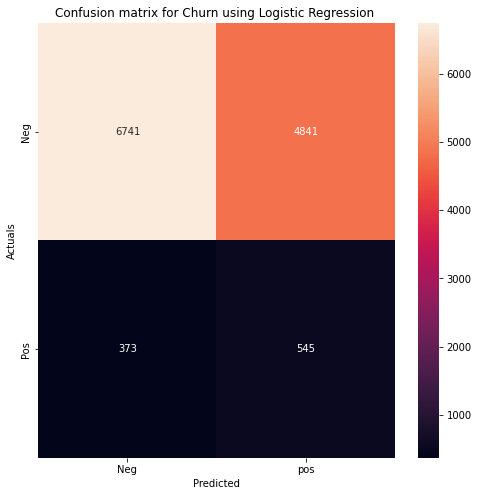

0.17
0.63


In [ ]:
#Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Logistic Regression ")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

#Classification Metrics for Logistic Regression
accuracy_logReg = round(accuracy_score(y_test,y_pred),2)
precision_logReg = round(precision_score(y_test,y_pred),2)
recall_logReg = round(recall_score(y_test,y_pred),2)
f1_logReg = round(f1_score(y_test,y_pred),2)
auc_logReg = round(roc_auc_score(y_test,best_estimator1.predict_proba(X_test)[:,1]),2)


print(f1_logReg)
print(auc_logReg)

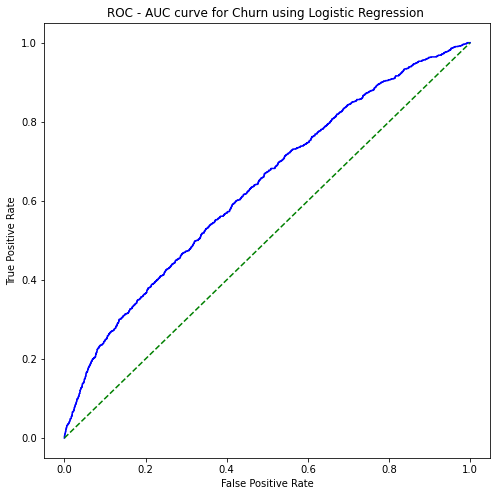

+-----------------------------------------------------------+----------+-----------+-----------+--------+----------+
|                           Model                           | F1 Score | AUC score | Precision | Recall | Accuracy |
+-----------------------------------------------------------+----------+-----------+-----------+--------+----------+
| Logistic Regression - UpSampling using RandomOverSampler  |   0.17   |    0.63   |    0.1    |  0.59  |   0.58   |
+-----------------------------------------------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Logistic Regression
fpr,tpr,threshold = roc_curve(y_test,best_estimator1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Logistic Regression ")
plt.show()



#PrettyTable for Logistic Regression
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Logistic Regression - UpSampling using RandomOverSampler ",f1_logReg,auc_logReg,precision_logReg,recall_logReg,accuracy_logReg])
print(pt)

#Tree based model - **Decision Tree classifier**

In [ ]:
param = {"max_depth":[3,5,7,9,12],"min_samples_split":[3,4,5,6]}

desicion_tree = DecisionTreeClassifier()

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search2 = GridSearchCV(desicion_tree,param_grid=param,scoring="roc_auc",n_jobs=-1)
result2 = grid_search2.fit(X_train_upsampled, y_train_upsampled)
best_estimator2 = result2.best_estimator_

#Using the best estimator on the trained upsampled data to predict
best_estimator2.fit(X_train_upsampled,y_train_upsampled)
y_pred = best_estimator2.predict(X_test)

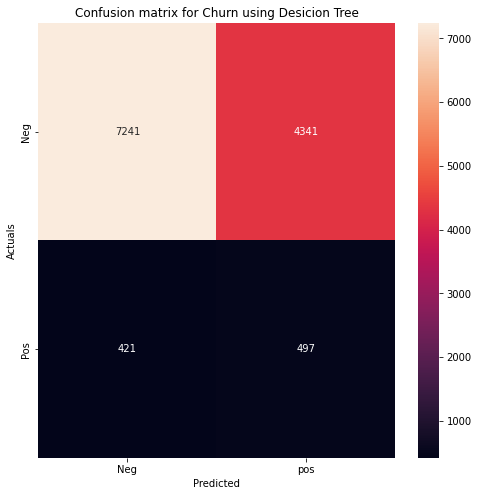

0.17
0.61


In [ ]:
#Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Desicion Tree")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

#Classification Metrics for Decision Tree
accuracy_desiciontree = round(accuracy_score(y_test,y_pred),2)
precision_desiciontree = round(precision_score(y_test,y_pred),2)
recall_desiciontree = round(recall_score(y_test,y_pred),2)
f1_desiciontree = round(f1_score(y_test,y_pred),2)
auc_desiciontree = round(roc_auc_score(y_test,best_estimator2.predict_proba(X_test)[:,1]),2)

print(f1_desiciontree)
print(auc_desiciontree)

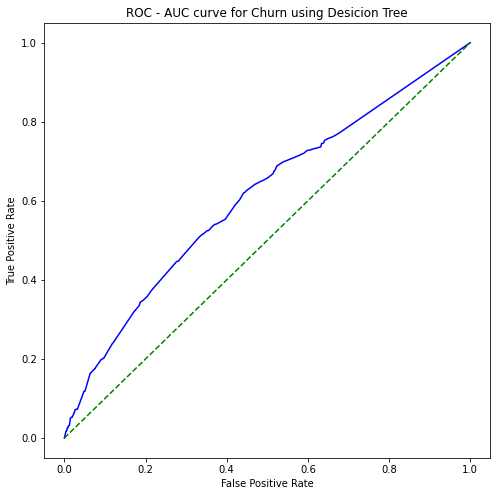

+----------------------------------------------------+----------+-----------+-----------+--------+----------+
|                       Model                        | F1 Score | AUC score | Precision | Recall | Accuracy |
+----------------------------------------------------+----------+-----------+-----------+--------+----------+
| Desicion Tree - UpSampling using RandomOverSampler |   0.17   |    0.61   |    0.1    |  0.54  |   0.62   |
+----------------------------------------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Decision Tree
fpr,tpr,threshold = roc_curve(y_test,best_estimator2.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Desicion Tree")
plt.show()

# #PrettyTable for Decision Tree
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Desicion Tree - UpSampling using RandomOverSampler",f1_desiciontree,auc_desiciontree,precision_desiciontree,recall_desiciontree,accuracy_desiciontree])
print(pt)

#Ensemble Models

##Model 1 - **Bagging Classifier**

In [ ]:
param = {"n_estimators":[60,80,100],"max_samples":[2,3,4],"max_features":[2,3,4]}

d_tree = DecisionTreeClassifier(max_depth = 5)
bag_classifier = BaggingClassifier(d_tree,n_jobs=-1,oob_score=True)

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search3 = GridSearchCV(bag_classifier,param_grid=param,scoring="roc_auc",n_jobs=-1)
result3 = grid_search3.fit(X_train_upsampled, y_train_upsampaled)
best_estimator3 = result3.best_estimator_

#Using the best estimator on the trained upsampled data to predict
best_estimator3.fit(X_train_upsampled,y_train_upsampled)
y_pred = best_estimator3.predict(X_test)

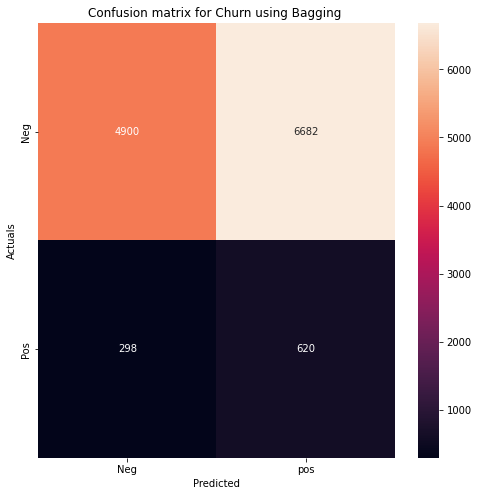

0.15
0.58


In [ ]:
#Confusion Matrix for Bagging
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Bagging ")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

#Classification Metrics for Bagging
accuracy_bag_classifier = round(accuracy_score(y_test,y_pred),2)
precision_bag_classifier = round(precision_score(y_test,y_pred),2)
recall_bag_classifier= round(recall_score(y_test,y_pred),2)
f1_bag_classifier = round(f1_score(y_test,y_pred),2)
auc_bag_classifier= round(roc_auc_score(y_test,best_estimator3.predict_proba(X_test)[:,1]),2)


print(f1_bag_classifier)
print(auc_bag_classifier)

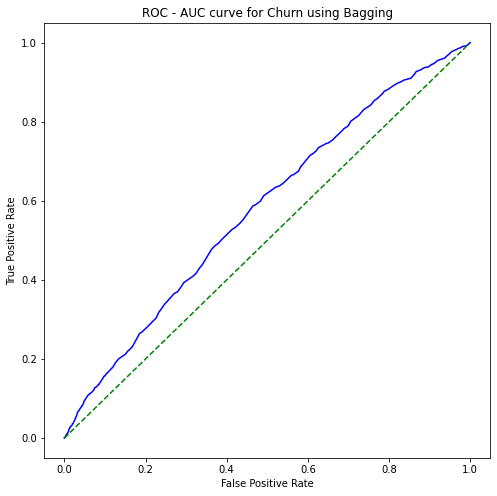

+----------------------------------------------+----------+-----------+-----------+--------+----------+
|                    Model                     | F1 Score | AUC score | Precision | Recall | Accuracy |
+----------------------------------------------+----------+-----------+-----------+--------+----------+
| Bagging - UpSampling using RandomOverSampler |   0.15   |    0.58   |    0.08   |  0.68  |   0.44   |
+----------------------------------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Bagging
fpr,tpr,threshold = roc_curve(y_test,best_estimator3.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Bagging")
plt.show()

#PrettyTable for Bagging
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Bagging - UpSampling using RandomOverSampler",f1_bag_classifier,auc_bag_classifier,precision_bag_classifier,recall_bag_classifier,accuracy_bag_classifier])
print(pt)

##Model 2 - **Random Forest**

###Using Upsampling with RandomOverSampler()

In [ ]:
param = {"n_estimators":[100,200,300,400],"max_depth":[5,7, 10, 13]}

random_forest = RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1,oob_score=True)

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search4 = GridSearchCV(random_forest,param_grid=param,scoring="roc_auc",n_jobs=-1)
result4 = grid_search4.fit(X_train_upsampled, y_train_upsampled)
best_estimator4 = result4.best_estimator_

#Using the best grid search parameters for better modeling
best_estimator4.fit(X_train_upsampled,y_train_upsampled)
y_pred = best_estimator4.predict(X_test)

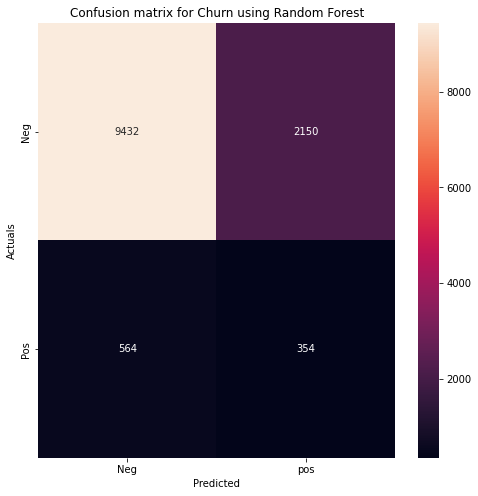

0.21
0.66


In [ ]:
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Random Forest")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

#Classification Metrics for Random Forest
accuracy_random_forest = round(accuracy_score(y_test,y_pred),2)
precision_random_forest= round(precision_score(y_test,y_pred),2)
recall_random_forest = round(recall_score(y_test,y_pred),2)
f1_random_forest = round(f1_score(y_test,y_pred),2)
auc_random_forest = round(roc_auc_score(y_test,best_estimator4.predict_proba(X_test)[:,1]),2)


print(f1_random_forest)
print(auc_random_forest)

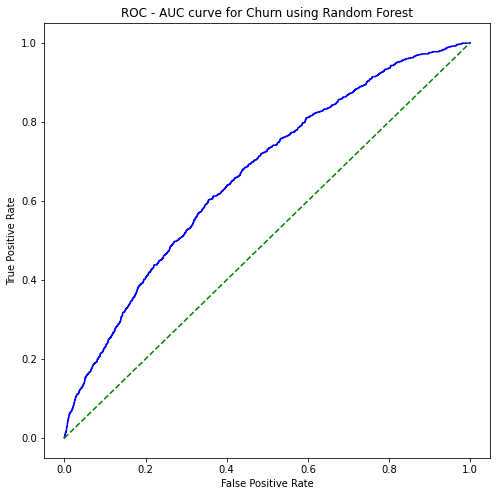

+----------------------------------------------------+----------+-----------+-----------+--------+----------+
|                       Model                        | F1 Score | AUC score | Precision | Recall | Accuracy |
+----------------------------------------------------+----------+-----------+-----------+--------+----------+
| Random Forest - UpSampling using RandomOverSampler |   0.21   |    0.66   |    0.14   |  0.39  |   0.78   |
+----------------------------------------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Random Forest
fpr,tpr,threshold = roc_curve(y_test,best_estimator4.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Random Forest")
plt.show()

#PrettyTable for Random Forest
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Random Forest - UpSampling using RandomOverSampler",f1_random_forest,auc_random_forest,precision_random_forest,recall_random_forest,accuracy_random_forest])
print(pt)

###Using Upsampling with SMOTE()

In [ ]:
sm = SMOTE()
X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train,y_train)

param = {"n_estimators":[20,40,70],"max_depth":[3,5,7]}

random_forest2 = RandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1,oob_score=True)

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search7 = GridSearchCV(random_forest2,param_grid=param,scoring="roc_auc",n_jobs=-1)
result7 = grid_search4.fit(X_train_upsampled, y_train_upsampled)
best_estimator7 = result7.best_estimator_

#Using the best grid search parameters for better modeling
best_estimator7.fit(X_train_upsampled,y_train_upsampled)
y_pred = best_estimator7.predict(X_test)


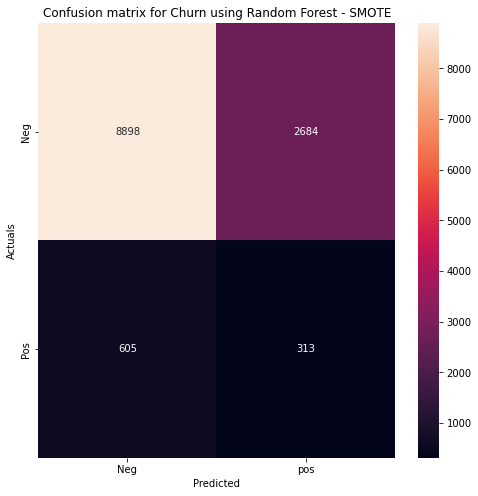

0.16
0.6


In [ ]:
#Confusion Matrix for Random Forest - SMOTE
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Random Forest - SMOTE")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()


#Classification Metrics for Random Forest- SMOTE
accuracy_rf_sm = round(accuracy_score(y_test,y_pred),2)
precision_rf_sm= round(precision_score(y_test,y_pred),2)
recall_rf_sm = round(recall_score(y_test,y_pred),2)
f1_rf_sm = round(f1_score(y_test,y_pred),2)
auc_rf_sm = round(roc_auc_score(y_test,best_estimator7.predict_proba(X_test)[:,1]),2)

print(f1_rf_sm)
print(auc_rf_sm)

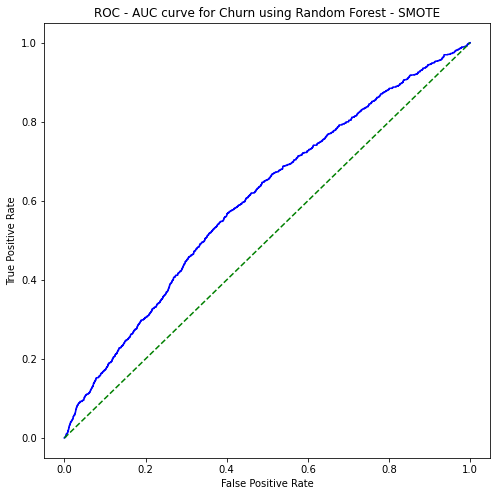

+----------------------------------------+----------+-----------+-----------+--------+----------+
|                 Model                  | F1 Score | AUC score | Precision | Recall | Accuracy |
+----------------------------------------+----------+-----------+-----------+--------+----------+
| Random Forest - UpSampling using SMOTE |   0.16   |    0.6    |    0.1    |  0.34  |   0.74   |
+----------------------------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Random Forest
fpr,tpr,threshold = roc_curve(y_test,best_estimator7.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Random Forest - SMOTE")
plt.show()

#PrettyTable for Random Forest
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Random Forest - UpSampling using SMOTE",f1_rf_sm,auc_rf_sm,precision_rf_sm,recall_rf_sm,accuracy_rf_sm])
print(pt)

##Model 3 - **Balanced Random Forest Classifier**

In [ ]:
param = {"n_estimators":[30,50,70,100],"max_depth":[3, 5, 9, 12],"min_samples_split":[3,5,7,9]}

brf = BalancedRandomForestClassifier(class_weight='balanced_subsample',n_jobs=-1,oob_score=True)

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search6 = GridSearchCV(brf,param_grid=param,scoring="roc_auc",cv=5,n_jobs=-1)
result6 = grid_search6.fit(X_train, y_train)
best_estimator6 = result6.best_estimator_

#Using the best grid search parameters for better modeling
best_estimator6.fit(X_train, y_train)
y_pred = best_estimator6.predict(X_test)

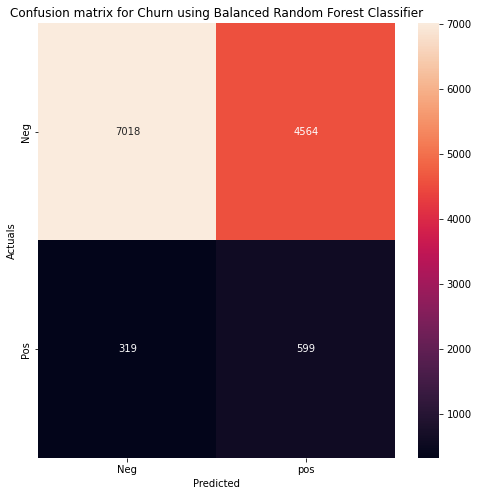

0.2
0.68


In [ ]:
#Confusion Matrix for Balanced Random Forest Classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Balanced Random Forest Classifier")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

#Classification Metrics for Balanced Random Forest Classifier
accuracy_brf = round(accuracy_score(y_test,y_pred),2)
precision_brf = round(precision_score(y_test,y_pred),2)
recall_brf= round(recall_score(y_test,y_pred),2)
f1_brf = round(f1_score(y_test,y_pred),2)
auc_brf= round(roc_auc_score(y_test,best_estimator6.predict_proba(X_test)[:,1]),2)

print(f1_brf)
print(auc_brf)

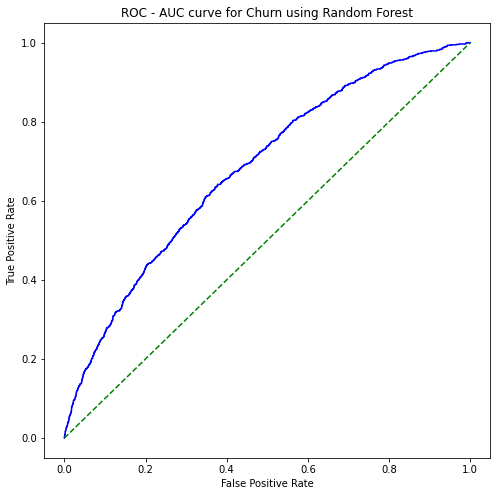

+-----------------------------------+----------+-----------+-----------+--------+----------+
|               Model               | F1 Score | AUC score | Precision | Recall | Accuracy |
+-----------------------------------+----------+-----------+-----------+--------+----------+
| Balanced Random Forest Classifier |   0.2    |    0.68   |    0.12   |  0.65  |   0.61   |
+-----------------------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Balanced Random Forest Classifier
fpr,tpr,threshold = roc_curve(y_test,best_estimator6.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Random Forest")
plt.show()

#PrettyTable for Balanced Random Forest Classifier
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Balanced Random Forest Classifier",f1_brf,auc_brf,precision_brf,recall_brf,accuracy_brf])
print(pt)

##Model 4 - **AdaBoost Classifier**

In [ ]:
param = {"base_estimator__splitter" :   ["best"], "n_estimators":[30,50,70,100] }

DTC = DecisionTreeClassifier(max_features = "auto", class_weight = "balanced", max_depth = 5)

ABC = AdaBoostClassifier(base_estimator = DTC)

#Using GridSearchCV to find the best hyper parameters and to get the best estimator
grid_search_ABC = GridSearchCV(ABC, param_grid=param, scoring = 'roc_auc', cv=10, n_jobs=-1)
grid_search7 = grid_search_ABC.fit(X_train_upsampled, y_train_upsampled)
best_estimator_ABC = grid_search7.best_estimator_

#Using the best grid search parameters to get the best possible model on the grid
best_estimator_ABC.fit(X_train, y_train)
y_pred = best_estimator_ABC.predict(X_test)

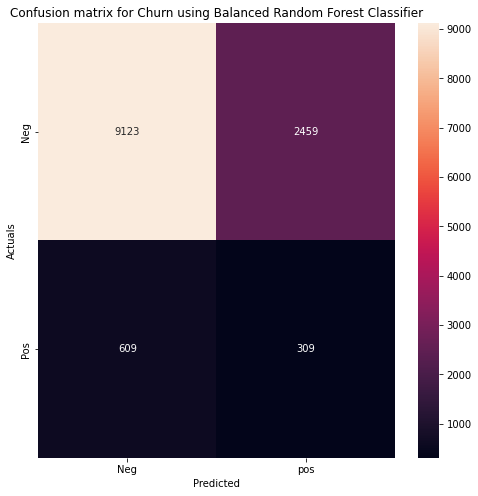

0.17
0.58


In [ ]:
#Confusion Matrix for Adaboost Classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm,annot=True,xticklabels=['Neg','pos'], yticklabels=['Neg','Pos'],fmt="d")
plt.title("Confusion matrix for Churn using Balanced Random Forest Classifier")
plt.ylabel('Actuals')
plt.xlabel('Predicted')
plt.show()

#Classification Metrics for Balanced Random Forest Classifier
accuracy_abc = round(accuracy_score(y_test,y_pred),2)
precision_abc = round(precision_score(y_test,y_pred),2)
recall_abc= round(recall_score(y_test,y_pred),2)
f1_abc = round(f1_score(y_test,y_pred),2)
auc_abc= round(roc_auc_score(y_test,best_estimator_ABC.predict_proba(X_test)[:,1]),2)

print(f1_abc)
print(auc_abc)

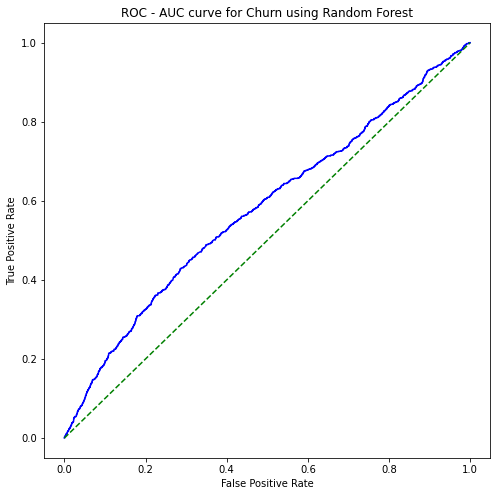

+---------------------+----------+-----------+-----------+--------+----------+
|        Model        | F1 Score | AUC score | Precision | Recall | Accuracy |
+---------------------+----------+-----------+-----------+--------+----------+
| AdaBoost Classifier |   0.17   |    0.58   |    0.11   |  0.34  |   0.75   |
+---------------------+----------+-----------+-----------+--------+----------+


In [ ]:
#ROC-AUC Curve for Balanced Random Forest Classifier
fpr,tpr,threshold = roc_curve(y_test,best_estimator_ABC.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'--',color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - AUC curve for Churn using Random Forest")
plt.show()

#PrettyTable for AdaBoost Classifier
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["AdaBoost Classifier",f1_abc,auc_abc,precision_abc,recall_abc,accuracy_abc])
print(pt)

#Results of Experimentation with different metrics

In [ ]:
#Presenting the results using a pretty Table
pt = PrettyTable()
pt.field_names = ["Model","F1 Score","AUC score","Precision","Recall","Accuracy"]
pt.add_row(["Logistic Regression",f1_logReg,auc_logReg,precision_logReg,recall_logReg,accuracy_logReg])
pt.add_row(["Desicion Tree Classifier",f1_desiciontree,auc_desiciontree,precision_desiciontree,recall_desiciontree,accuracy_desiciontree])
pt.add_row(["Bagging",f1_bag_classifier,auc_bag_classifier,precision_bag_classifier,recall_bag_classifier,accuracy_bag_classifier])
pt.add_row(["Random Forest(using ROS)",f1_random_forest,auc_random_forest,precision_random_forest,recall_random_forest,accuracy_random_forest])
pt.add_row(["Random Forest(using SMOTE)",f1_rf_sm,auc_rf_sm,precision_rf_sm,recall_rf_sm,accuracy_rf_sm])
#pt.add_row(["Balanced Bagging Classifier",f1_bbc,auc_bbc,precision_bbc,recall_bbc,accuracy_bbc])
pt.add_row(["Balanced Random Forest Classifier",f1_brf,auc_brf,precision_brf,recall_brf,accuracy_brf])
pt.add_row(["AdaBoost Classifier",f1_abc,auc_abc,precision_abc,recall_abc,accuracy_abc])
print(pt)

+-----------------------------------+----------+-----------+-----------+--------+----------+
|               Model               | F1 Score | AUC score | Precision | Recall | Accuracy |
+-----------------------------------+----------+-----------+-----------+--------+----------+
|        Logistic Regression        |   0.17   |    0.63   |    0.1    |  0.59  |   0.58   |
|      Desicion Tree Classifier     |   0.17   |    0.61   |    0.1    |  0.54  |   0.62   |
|              Bagging              |   0.15   |    0.58   |    0.08   |  0.68  |   0.44   |
|      Random Forest(using ROS)     |   0.21   |    0.66   |    0.14   |  0.39  |   0.78   |
|     Random Forest(using SMOTE)    |   0.16   |    0.6    |    0.1    |  0.34  |   0.74   |
| Balanced Random Forest Classifier |   0.2    |    0.68   |    0.12   |  0.65  |   0.61   |
|        AdaBoost Classifier        |   0.15   |    0.56   |    0.11   |  0.28  |   0.77   |
+-----------------------------------+----------+-----------+----------

#Conclusions

1. The data is highly imbalanced with lots of missing values and outliers.
2. Due to the lack of documentation on the data, couldn't relate to the data set from the domain perspective.
3. Observed Multi-Collinearity in the data.
4. Balanced Random Forest model performs best on this data.
5. As expected,Tree-based Models performed well compared to Logistic Regression.
6. Due to constraints on computational power couldn't explore the power of GridSearchCV.
7. There is a scope for improvement in the performance of the model.
        

#Future scope



*   Work on improving the model performance by -
           1. Treating the outliers
           2. Identifying the multi-collinearity between the  categorical variables
           3. Exploring GridSearchCV with full potential on  highly configured VMs
          4. Explore feature selection methods Information Gain and Permutation Importance
          5. Extend the model to predict Appetency and Upselling.

*   Learning to deal with large datasets by experimenting 
with them.